In [6]:

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df=pd.read_csv("data.csv")


In [7]:
df=df.drop(columns=df.columns[0])

In [8]:
df = df.loc[df["class"] != 0]


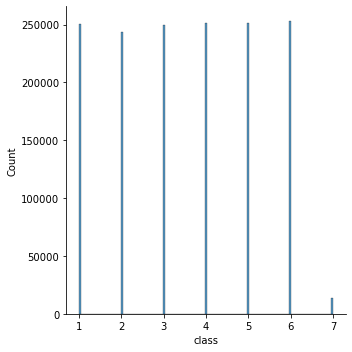

In [9]:
sns.displot(df['class'])

In [11]:
df2=df['class']

df1=df.drop(['class'],axis='columns')


In [12]:

x_train,x_test,y_train,y_test=train_test_split(df1,df2,test_size=0.25)

In [14]:

model = DecisionTreeClassifier(random_state=24)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=24)

In [15]:
model.score(x_test,y_test)

0.9812421335420479

In [16]:
y_pred=model.predict(x_test)

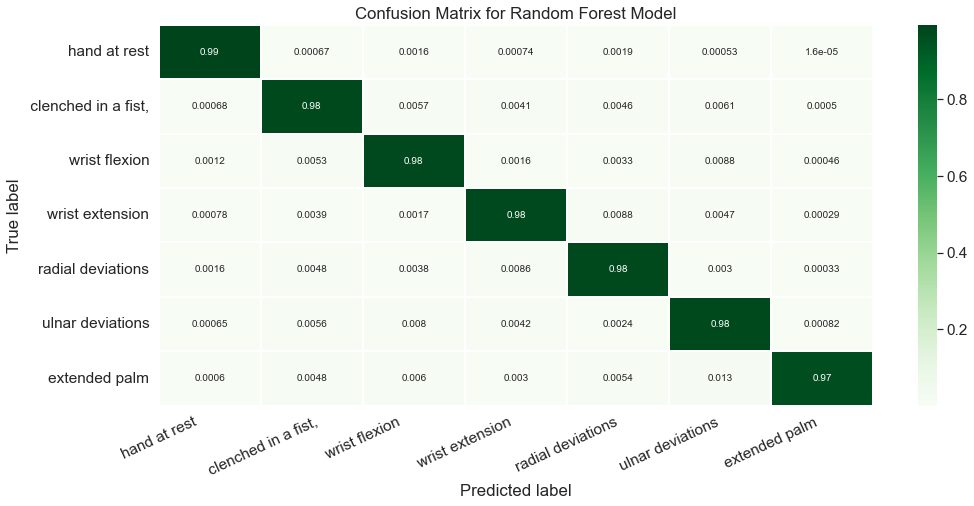

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['hand at rest', ' clenched in a fist,', 'wrist flexion', 
               'wrist extension', 'radial deviations', 'ulnar deviations',    
               'extended palm']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()